In [1]:
# ---------------------------------- TITLE -------------------------------------
# 08_LDAproj_wordstats.ipynb
# AUTHOR: HARUKA TAKAGI
# DATE: JULY 19, 2020
# ENCODING: utf-8
# PYTHON VERSION: 3.7

# ---------------------------------- NOTES -------------------------------------
# The purpose of this script is produce graphs on the word frequency and give
# general statistics to understand our data set better. 

# ---------------------------------- SETUP -------------------------------------

import matplotlib.pyplot as plt 
import pandas as pd 


In [2]:
# ---------------------------------- SAVE MECHANISM -------------------------------------

from IPython.display import Javascript
from nbconvert import HTMLExporter
import time

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript'])

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

output_file = '/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/FOMC_Historical_Materials_wordstats.html'
current_file = '/Users/harukatakagi/Dropbox/FOMC_Board/Code/08_LDAproj_wordstats.ipynb'

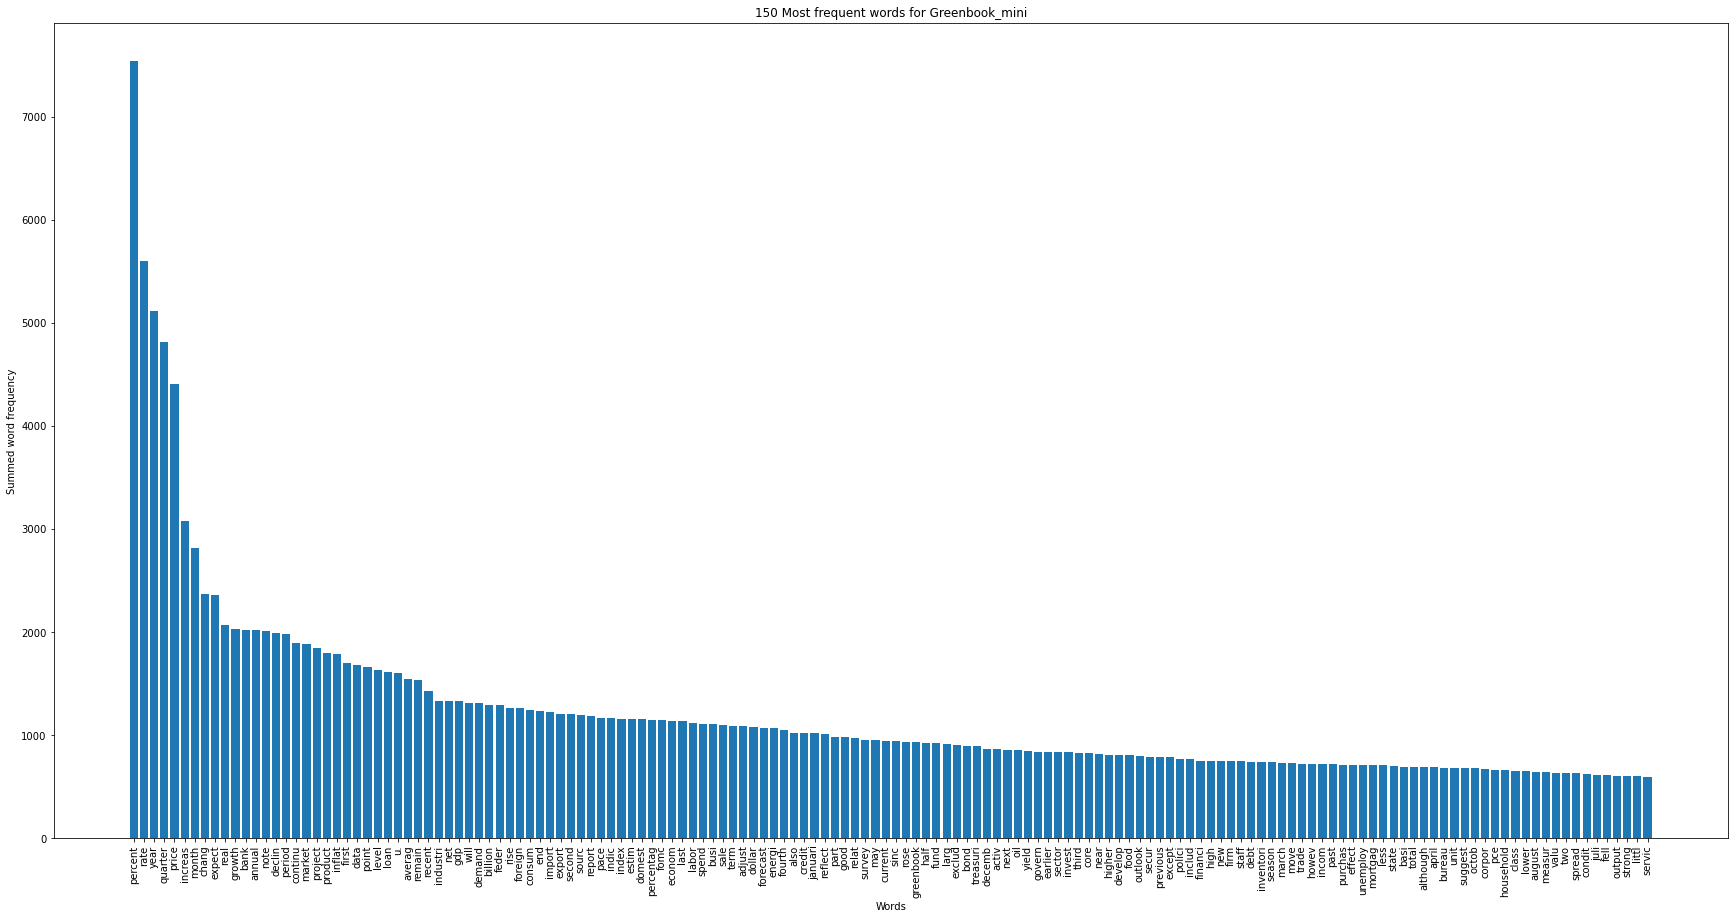

<Figure size 432x288 with 0 Axes>

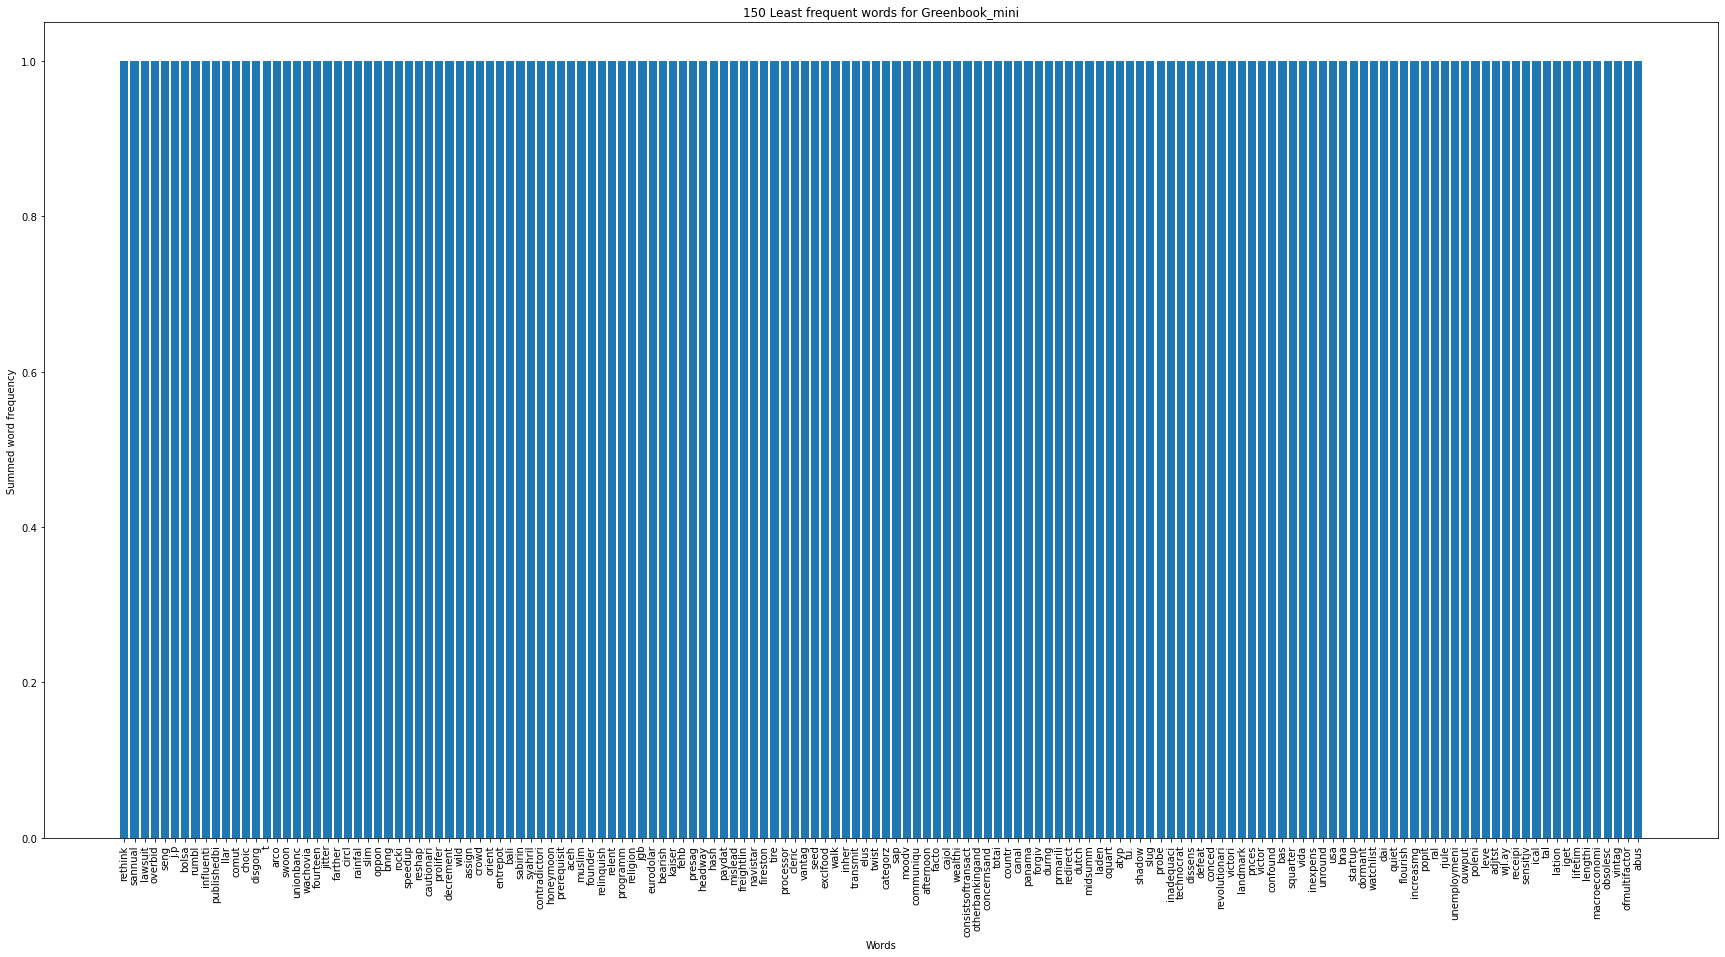

10.0% of Most Frequent Words in Greenbook_mini
percent rate year quarter price increas month chang expect real growth bank annual note declin period continu market project product inflat first data point level loan u. averag remain recent industri net gdp will demand billion feder rise foreign consum end import export second sourc report pace indic index estim domest percentag fomc econom last labor spend busi sale term adjust dollar forecast energi fourth also credit januari reflect part good relat survey may current sinc rose greenbook half fund larg exclud bond treasuri decemb activ next oil yield govern earlier sector invest third core near higher develop food outlook secur previous except polici includ financi high new firm staff debt inventori season march move trade howev incom past purchas effect unemploy mortgag less state basi total although april bureau unit suggest octob corpor pce household class lower august measur valu two spread condit juli fell output strong littl serv

In [3]:
# ---------------------------------- CODE -------------------------------------

# ---------------------------------- GREENBOOK_MINI -------------------------------------
# Read in dataframe
dataframe = pd.read_csv("/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_documentfrequencymatrix/Greenbook_mini_dfm.csv", encoding ="utf-8") 

# Get column names as a list
word_list = list(dataframe.columns)

# Drop document from the list
word_list.remove('document')

# Drop first column from dataframe
dataframe = dataframe.drop(dataframe.columns[0], axis = 1)

# Get word frequencies
word_freq = []
for i in range(len(dataframe.columns)):
    total = dataframe[dataframe.columns[i]].sum()
    word_freq = word_freq + [total]
    
# Create dataframe for summed word frequencies
columns = ['word', 'summed_frequency']
sum_df = pd.DataFrame(columns=columns)
sum_df['word'] = word_list
sum_df['summed_frequency'] = word_freq
sum_df = sum_df.sort_values(by=['summed_frequency'], ascending=False)

# Thresholds for visualization trimming
total_len = len(dataframe.columns)
top_columns = 150
bottom_columns = (len(dataframe.columns) - 150)

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Create graphs and statistics for most and least frequent words
f = plt.subplots(figsize=(30,15))
plt.bar(most_freq_df['word'], most_freq_df['summed_frequency'])
plt.title('150 Most frequent words for Greenbook_mini')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/150_Most_frequent_words_for_Greenbook_mini.png', dpi=200)

f = plt.subplots(figsize=(30,15))
plt.bar(least_freq_df['word'], least_freq_df['summed_frequency'])
plt.title('150 Least frequent words for Greenbook_mini')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
plt.show()

# Print word stats

# Thresholds for word stats
total_len = len(dataframe.columns)
most = 0.1
bottom = 0.1
top_columns = round((len(dataframe.columns)) * most)
bottom_columns = round(len(dataframe.columns) - (len(dataframe.columns) * bottom))

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Reset the index of the dataframe
most_freq_df = most_freq_df.reset_index()
least_freq_df = least_freq_df.reset_index()

# Print found results
most_word_list_greenbook_mini = []
for i in range(len(most_freq_df)):
    most_word_list_greenbook_mini = most_word_list_greenbook_mini + [most_freq_df['word'][i]]
    i = i + 1

print(str(most * 100) + '% of Most Frequent Words in Greenbook_mini')
print(' '.join(most_word_list_greenbook_mini))

least_word_list_greenbook_mini = []
for i in range(len(least_freq_df)):
    least_word_list_greenbook_mini = least_word_list_greenbook_mini + [least_freq_df['word'][i]]
    i = i + 1
print('\n')
print(str(bottom * 100) + '% of Least Frequent Words in Greenbook_mini')
print(' '.join(least_word_list_greenbook_mini))

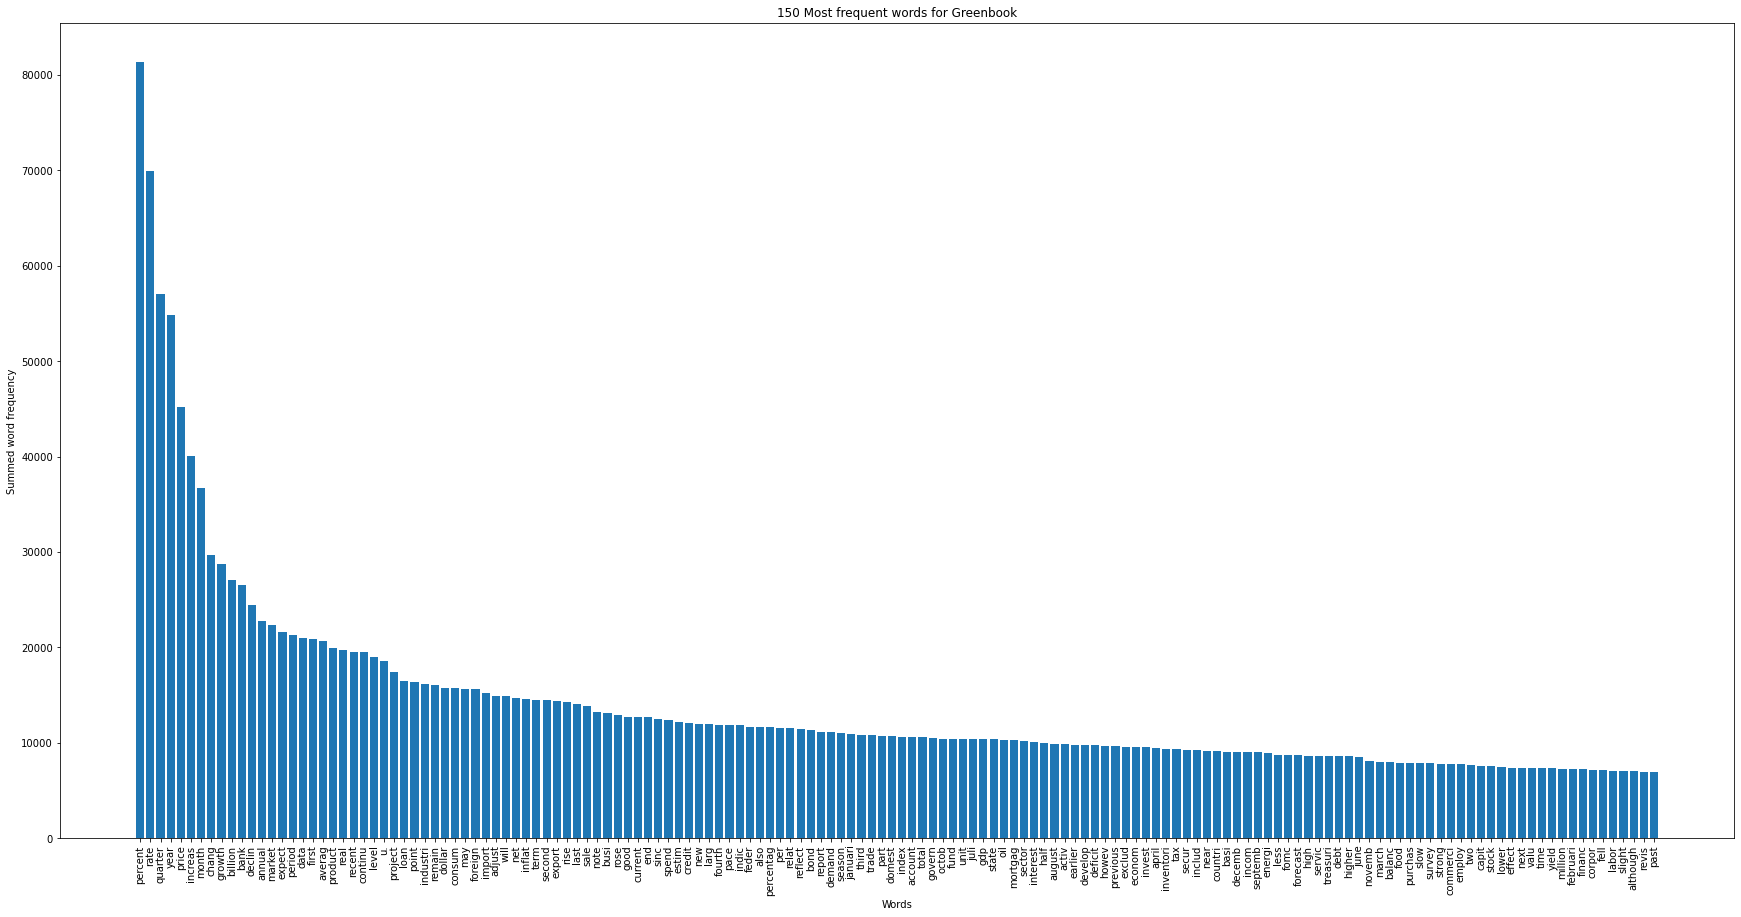

<Figure size 432x288 with 0 Axes>

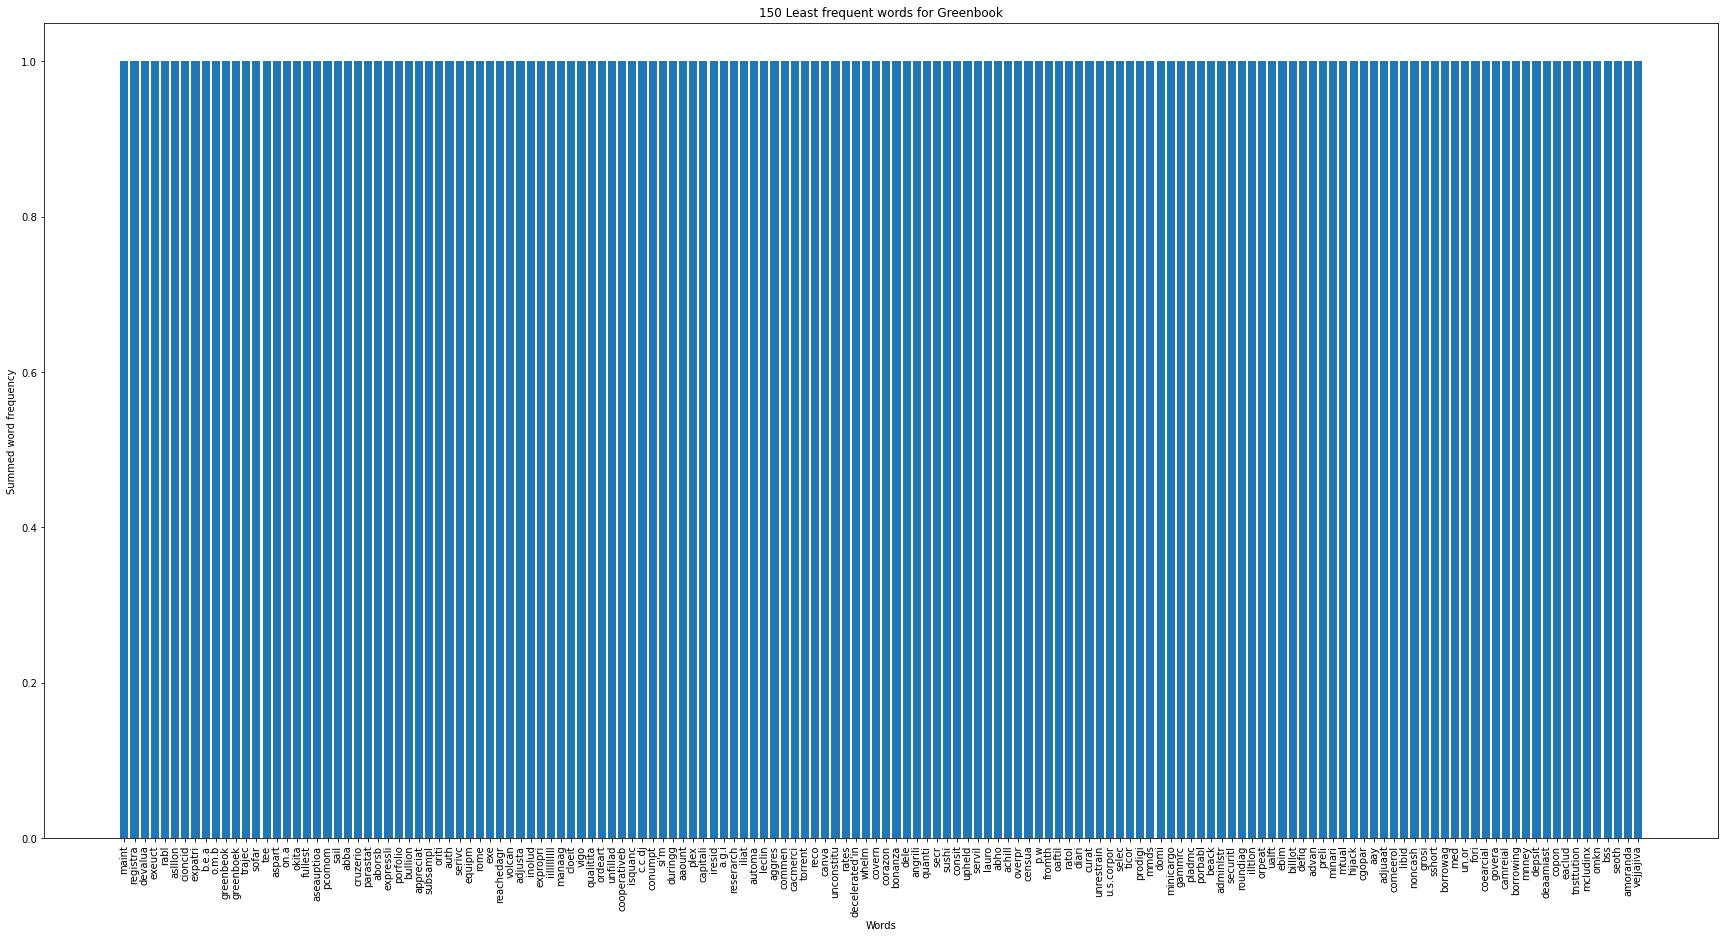

10.0% of Most Frequent Words in Greenbook
percent rate quarter year price increas month chang growth billion bank declin annual market expect period data first averag product real recent continu level u. project loan point industri remain dollar consum may foreign import adjust will net inflat term second export rise last sale note busi rose good current end sinc spend estim credit new larg fourth pace indic feder also percentag per relat reflect bond report demand season januari third trade part domest index account total govern octob fund unit juli gdp state oil mortgag sector interest half august activ earlier develop deficit howev previous exclud econom invest april inventori tax secur includ near countri basi decemb incom septemb energi less fomc forecast high servic treasuri debt higher june novemb march balanc food purchas slow survey strong commerci employ two capit stock lower effect next valu time yield million februari financ corpor fell labor slight although revis past sugg

In [4]:
# ---------------------------------- GREENBOOK -------------------------------------
# Read in dataframe
dataframe = pd.read_csv("/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_documentfrequencymatrix/Greenbook_dfm.csv", encoding ="utf-8") 

# Get column names as a list
word_list = list(dataframe.columns)

# Drop document from the list
word_list.remove('document')

# Drop first column from dataframe
dataframe = dataframe.drop(dataframe.columns[0], axis = 1)

# Get word frequencies
word_freq = []
for i in range(len(dataframe.columns)):
    total = dataframe[dataframe.columns[i]].sum()
    word_freq = word_freq + [total]
    
# Create dataframe for summed word frequencies
columns = ['word', 'summed_frequency']
sum_df = pd.DataFrame(columns=columns)
sum_df['word'] = word_list
sum_df['summed_frequency'] = word_freq
sum_df = sum_df.sort_values(by=['summed_frequency'], ascending=False)

# Thresholds for visualization trimming
total_len = len(dataframe.columns)
top_columns = 150
bottom_columns = (len(dataframe.columns) - 150)

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Create graphs and statistics for most and least frequent words
f = plt.subplots(figsize=(30,15))
plt.bar(most_freq_df['word'], most_freq_df['summed_frequency'])
plt.title('150 Most frequent words for Greenbook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/150_Most_frequent_words_for_Greenbook.png', dpi=200)

f = plt.subplots(figsize=(30,15))
plt.bar(least_freq_df['word'], least_freq_df['summed_frequency'])
plt.title('150 Least frequent words for Greenbook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
plt.show()

# Print word stats

# Thresholds for word stats
total_len = len(dataframe.columns)
most = 0.1
bottom = 0.1
top_columns = round((len(dataframe.columns)) * most)
bottom_columns = round(len(dataframe.columns) - (len(dataframe.columns) * bottom))

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Reset the index of the dataframe
most_freq_df = most_freq_df.reset_index()
least_freq_df = least_freq_df.reset_index()

# Print found results
most_word_list_greenbook = []
for i in range(len(most_freq_df)):
    most_word_list_greenbook = most_word_list_greenbook + [most_freq_df['word'][i]]
    i = i + 1

print(str(most * 100) + '% of Most Frequent Words in Greenbook')
print(' '.join(most_word_list_greenbook))

least_word_list_greenbook = []
for i in range(len(least_freq_df)):
    least_word_list_greenbook = least_word_list_greenbook + [least_freq_df['word'][i]]
    i = i + 1
print('\n')
print(str(bottom * 100) + '% of Least Frequent Words in Greenbook')
print(' '.join(least_word_list_greenbook))

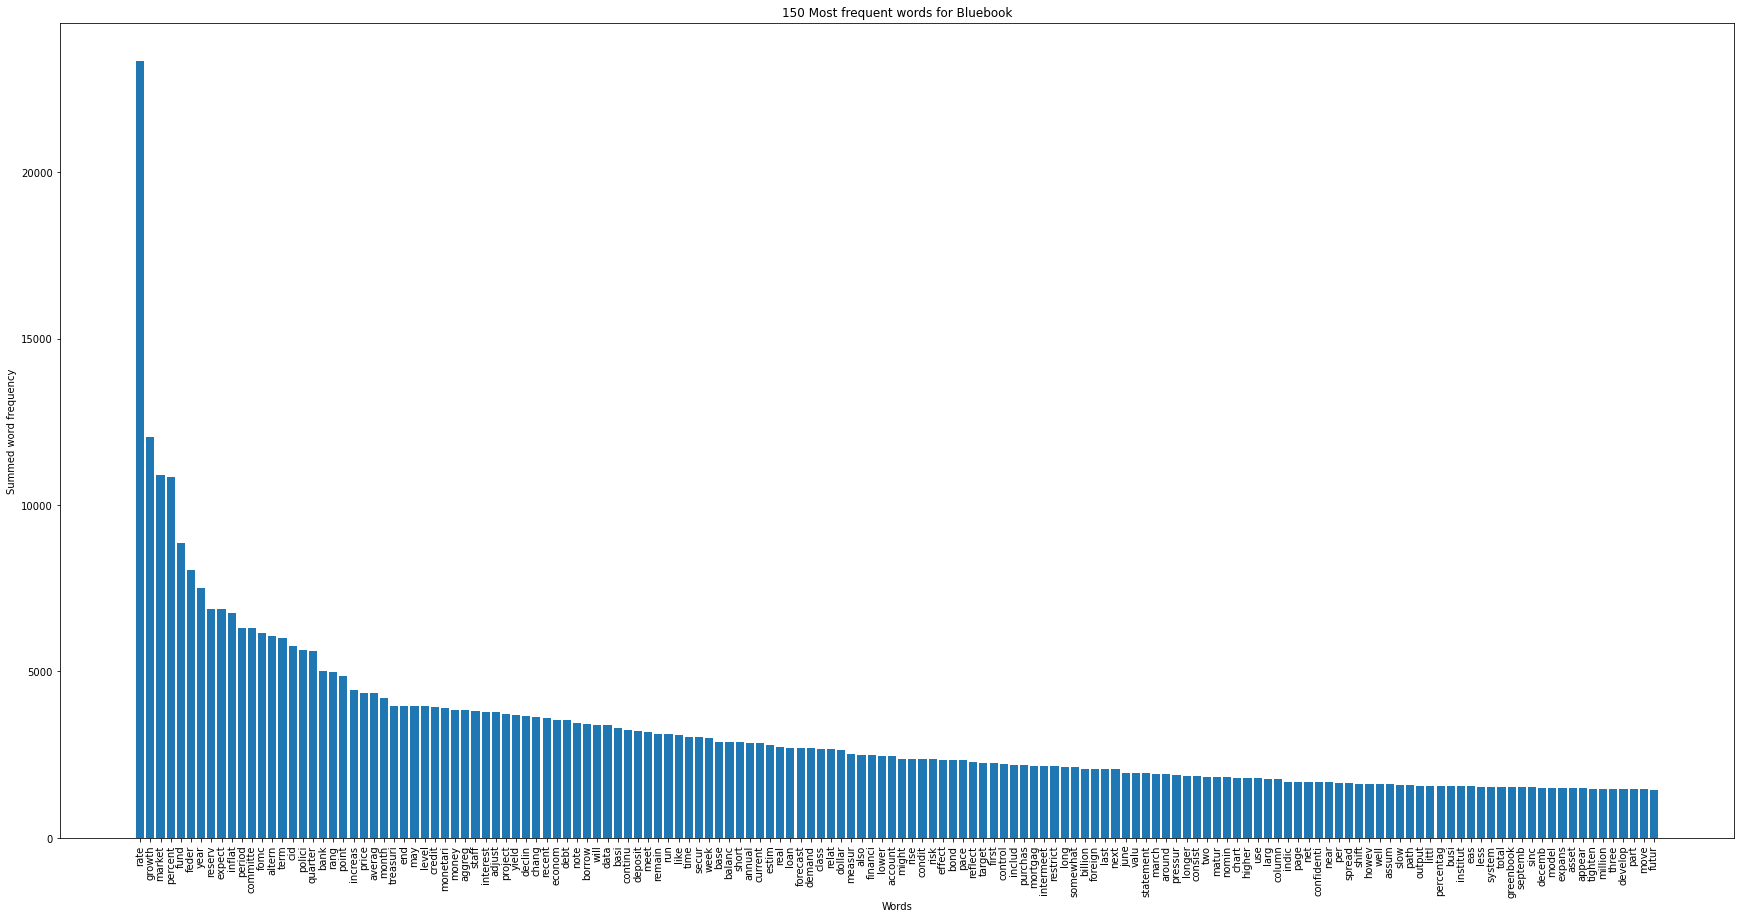

<Figure size 432x288 with 0 Axes>

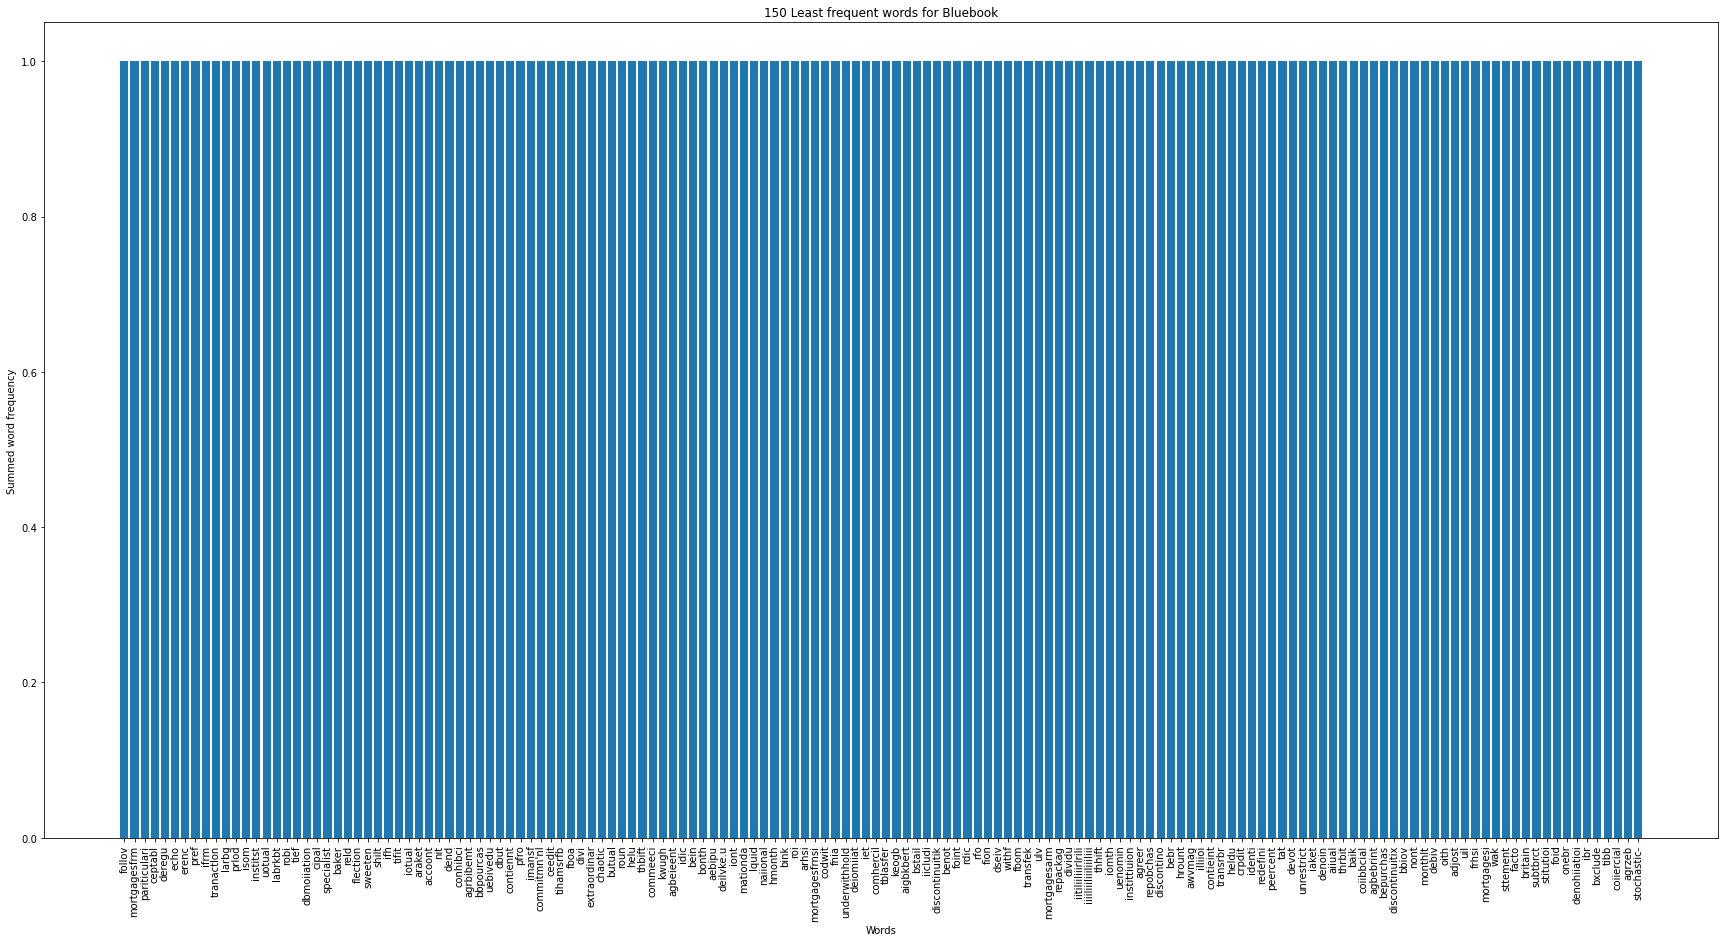

10.0% of Most Frequent Words in Bluebook
rate growth market percent fund feder year reserv expect inflat period committe fomc altern term cid polici quarter bank rang point increas price averag month treasuri end may level credit monetari money aggreg staff interest adjust project yield declin chang recent econom debt note borrow will data basi continu deposit meet remain run like time secur week base balanc short annual current estim real loan forecast demand class relat dollar measur also financi lower account might rise condit risk effect bond pace reflect target first control includ purchas mortgag intermeet restrict long somewhat billion foreign last next june valu statement march around pressur longer consist two matur nomin chart higher use larg column indic page net confidenti near per spread shift howev well assum slow path output littl percentag busi institut eas less system total greenbook septemb sinc decemb model expans asset appear tighten million three develop part move 

In [5]:
# ---------------------------------- BLUEBOOK -------------------------------------
# Read in dataframe
dataframe = pd.read_csv("/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_documentfrequencymatrix/Bluebook_dfm.csv", encoding ="utf-8") 

# Get column names as a list
word_list = list(dataframe.columns)

# Drop document from the list
word_list.remove('document')

# Drop first column from dataframe
dataframe = dataframe.drop(dataframe.columns[0], axis = 1)

# Get word frequencies
word_freq = []
for i in range(len(dataframe.columns)):
    total = dataframe[dataframe.columns[i]].sum()
    word_freq = word_freq + [total]
    
# Create dataframe for summed word frequencies
columns = ['word', 'summed_frequency']
sum_df = pd.DataFrame(columns=columns)
sum_df['word'] = word_list
sum_df['summed_frequency'] = word_freq
sum_df = sum_df.sort_values(by=['summed_frequency'], ascending=False)

# Thresholds for visualization trimming
total_len = len(dataframe.columns)
top_columns = 150
bottom_columns = (len(dataframe.columns) - 150)

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Create graphs and statistics for most and least frequent words
f = plt.subplots(figsize=(30,15))
plt.bar(most_freq_df['word'], most_freq_df['summed_frequency'])
plt.title('150 Most frequent words for Bluebook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/150_Most_frequent_words_for_Bluebook.png', dpi=200)

f = plt.subplots(figsize=(30,15))
plt.bar(least_freq_df['word'], least_freq_df['summed_frequency'])
plt.title('150 Least frequent words for Bluebook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
plt.show()

# Print word stats

# Thresholds for word stats
total_len = len(dataframe.columns)
most = 0.1
bottom = 0.1
top_columns = round((len(dataframe.columns)) * most)
bottom_columns = round(len(dataframe.columns) - (len(dataframe.columns) * bottom))

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Reset the index of the dataframe
most_freq_df = most_freq_df.reset_index()
least_freq_df = least_freq_df.reset_index()

# Print found results
most_word_list_bluebook = []
for i in range(len(most_freq_df)):
    most_word_list_bluebook = most_word_list_bluebook + [most_freq_df['word'][i]]
    i = i + 1

print(str(most * 100) + '% of Most Frequent Words in Bluebook')
print(' '.join(most_word_list_bluebook))

least_word_list_bluebook = []
for i in range(len(least_freq_df)):
    least_word_list_bluebook = least_word_list_bluebook + [least_freq_df['word'][i]]
    i = i + 1
print('\n')
print(str(bottom * 100) + '% of Least Frequent Words in Bluebook')
print(' '.join(least_word_list_bluebook))

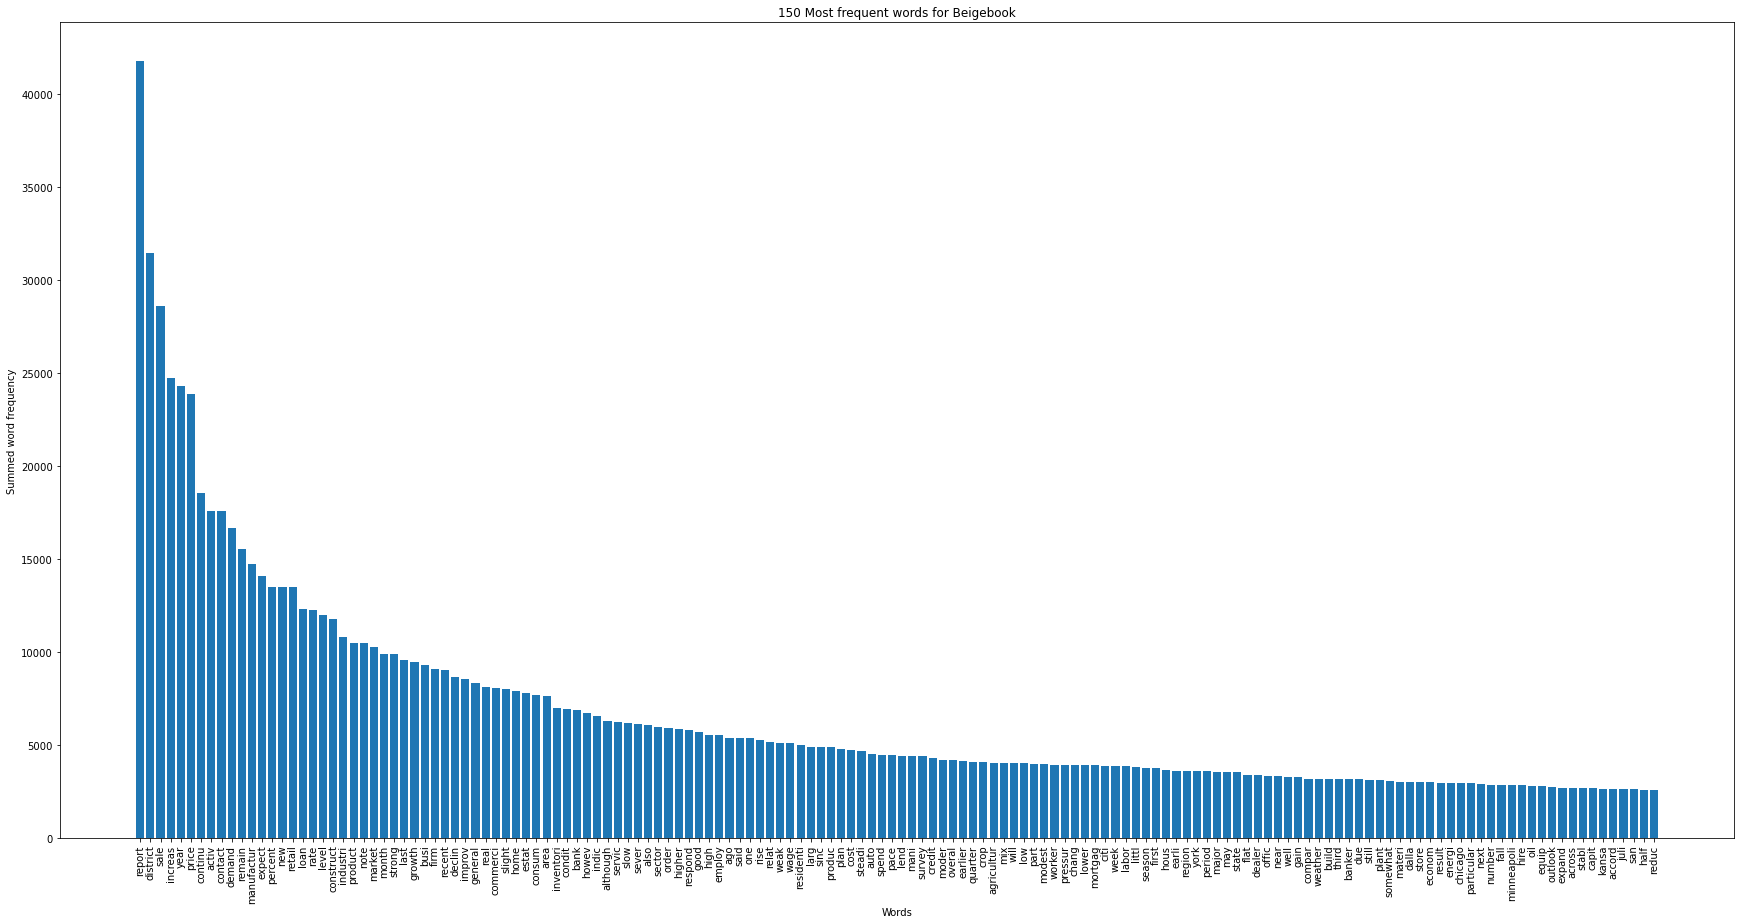

<Figure size 432x288 with 0 Axes>

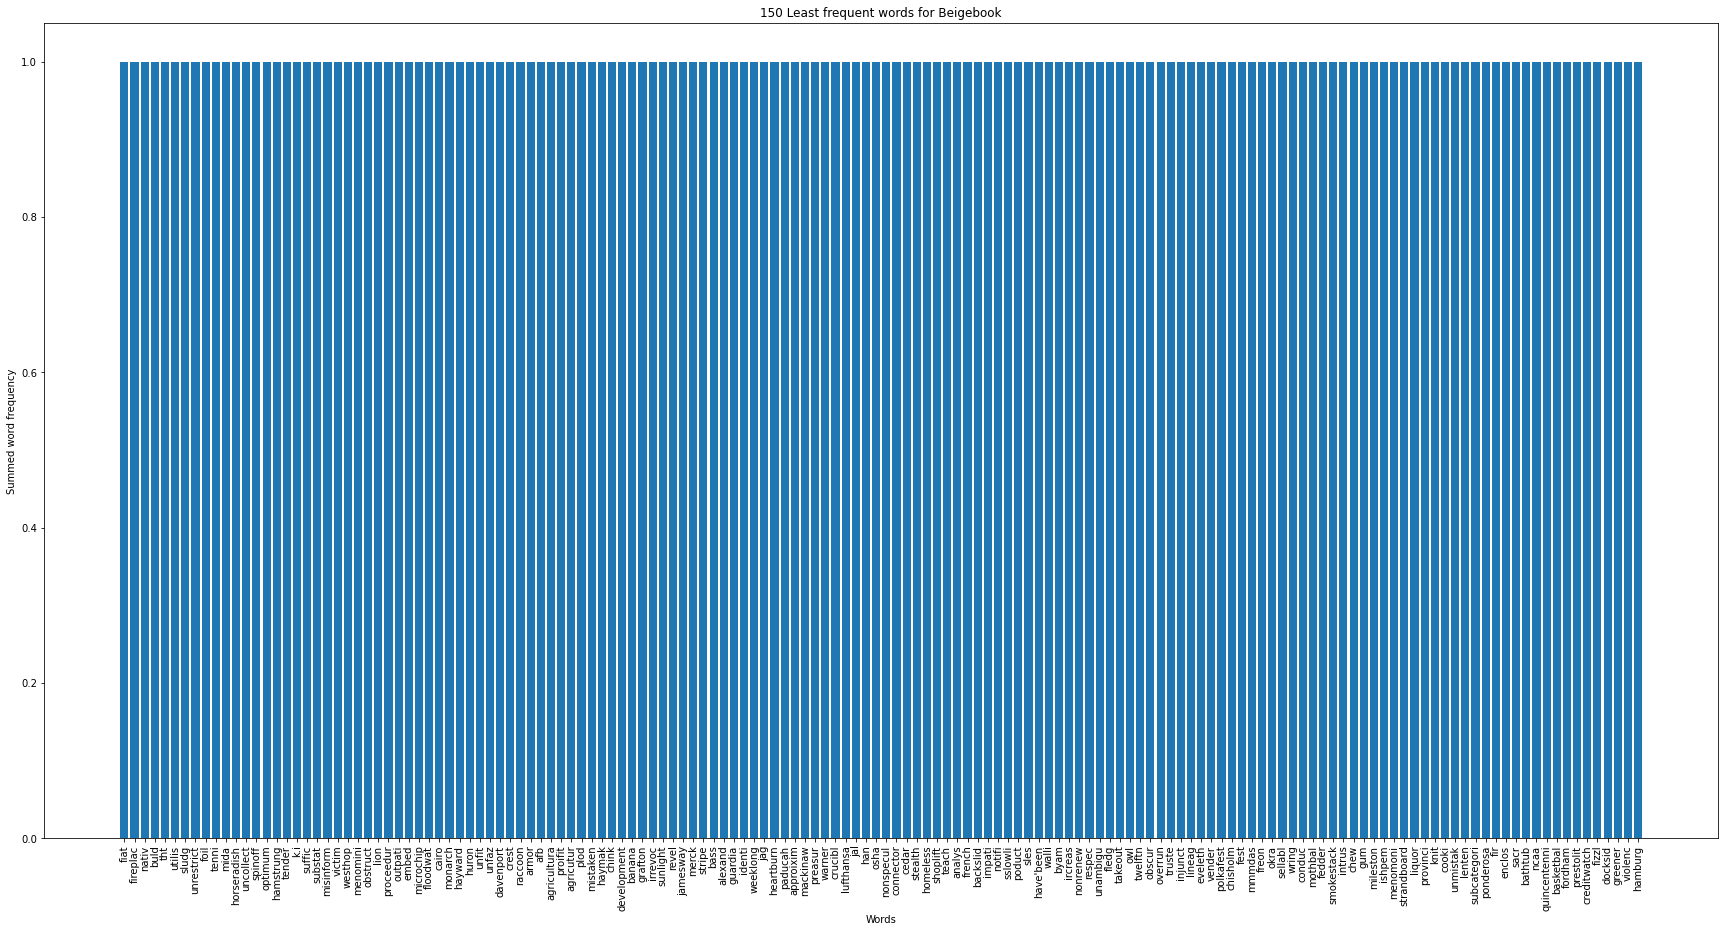

10.0% of Most Frequent Words in Beigebook
report district sale increas year price continu activ contact demand remain manufactur expect percent new retail loan rate level construct industri product note market month strong last growth busi firm recent declin improv general real commerci slight home estat consum area inventori condit bank howev indic although servic slow sever also sector order higher respond good high employ ago said one rise relat weak wage residenti larg sinc produc plan cost steadi auto spend pace lend mani survey credit moder overal earlier quarter crop agricultur mix will low part modest worker pressur chang lower mortgag citi week labor littl season first hous earli region york period major may state flat dealer offic near well gain compar weather build third banker due still plant somewhat materi dalla store econom result energi chicago particular next number fall minneapoli hire oil equip outlook expand across stabl capit kansa accord juli san half reduc atlant

In [6]:
# ---------------------------------- BEIGEBOOK -------------------------------------
# Read in dataframe
dataframe = pd.read_csv("/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_documentfrequencymatrix/Beigebook_dfm.csv", encoding ="utf-8") 

# Get column names as a list
word_list = list(dataframe.columns)

# Drop document from the list
word_list.remove('document')

# Drop first column from dataframe
dataframe = dataframe.drop(dataframe.columns[0], axis = 1)

# Get word frequencies
word_freq = []
for i in range(len(dataframe.columns)):
    total = dataframe[dataframe.columns[i]].sum()
    word_freq = word_freq + [total]
    
# Create dataframe for summed word frequencies
columns = ['word', 'summed_frequency']
sum_df = pd.DataFrame(columns=columns)
sum_df['word'] = word_list
sum_df['summed_frequency'] = word_freq
sum_df = sum_df.sort_values(by=['summed_frequency'], ascending=False)

# Thresholds for visualization trimming
total_len = len(dataframe.columns)
top_columns = 150
bottom_columns = (len(dataframe.columns) - 150)

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Create graphs and statistics for most and least frequent words
f = plt.subplots(figsize=(30,15))
plt.bar(most_freq_df['word'], most_freq_df['summed_frequency'])
plt.title('150 Most frequent words for Beigebook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/150_Most_frequent_words_for_Beigebook.png', dpi=200)

f = plt.subplots(figsize=(30,15))
plt.bar(least_freq_df['word'], least_freq_df['summed_frequency'])
plt.title('150 Least frequent words for Beigebook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
plt.show()

# Print word stats

# Thresholds for word stats
total_len = len(dataframe.columns)
most = 0.1
bottom = 0.1
top_columns = round((len(dataframe.columns)) * most)
bottom_columns = round(len(dataframe.columns) - (len(dataframe.columns) * bottom))

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Reset the index of the dataframe
most_freq_df = most_freq_df.reset_index()
least_freq_df = least_freq_df.reset_index()

# Print found results
most_word_list_beigebook = []
for i in range(len(most_freq_df)):
    most_word_list_beigebook = most_word_list_beigebook + [most_freq_df['word'][i]]
    i = i + 1

print(str(most * 100) + '% of Most Frequent Words in Beigebook')
print(' '.join(most_word_list_beigebook))

least_word_list_beigebook = []
for i in range(len(least_freq_df)):
    least_word_list_beigebook = least_word_list_beigebook + [least_freq_df['word'][i]]
    i = i + 1
print('\n')
print(str(bottom * 100) + '% of Least Frequent Words in Beigebook')
print(' '.join(least_word_list_beigebook))

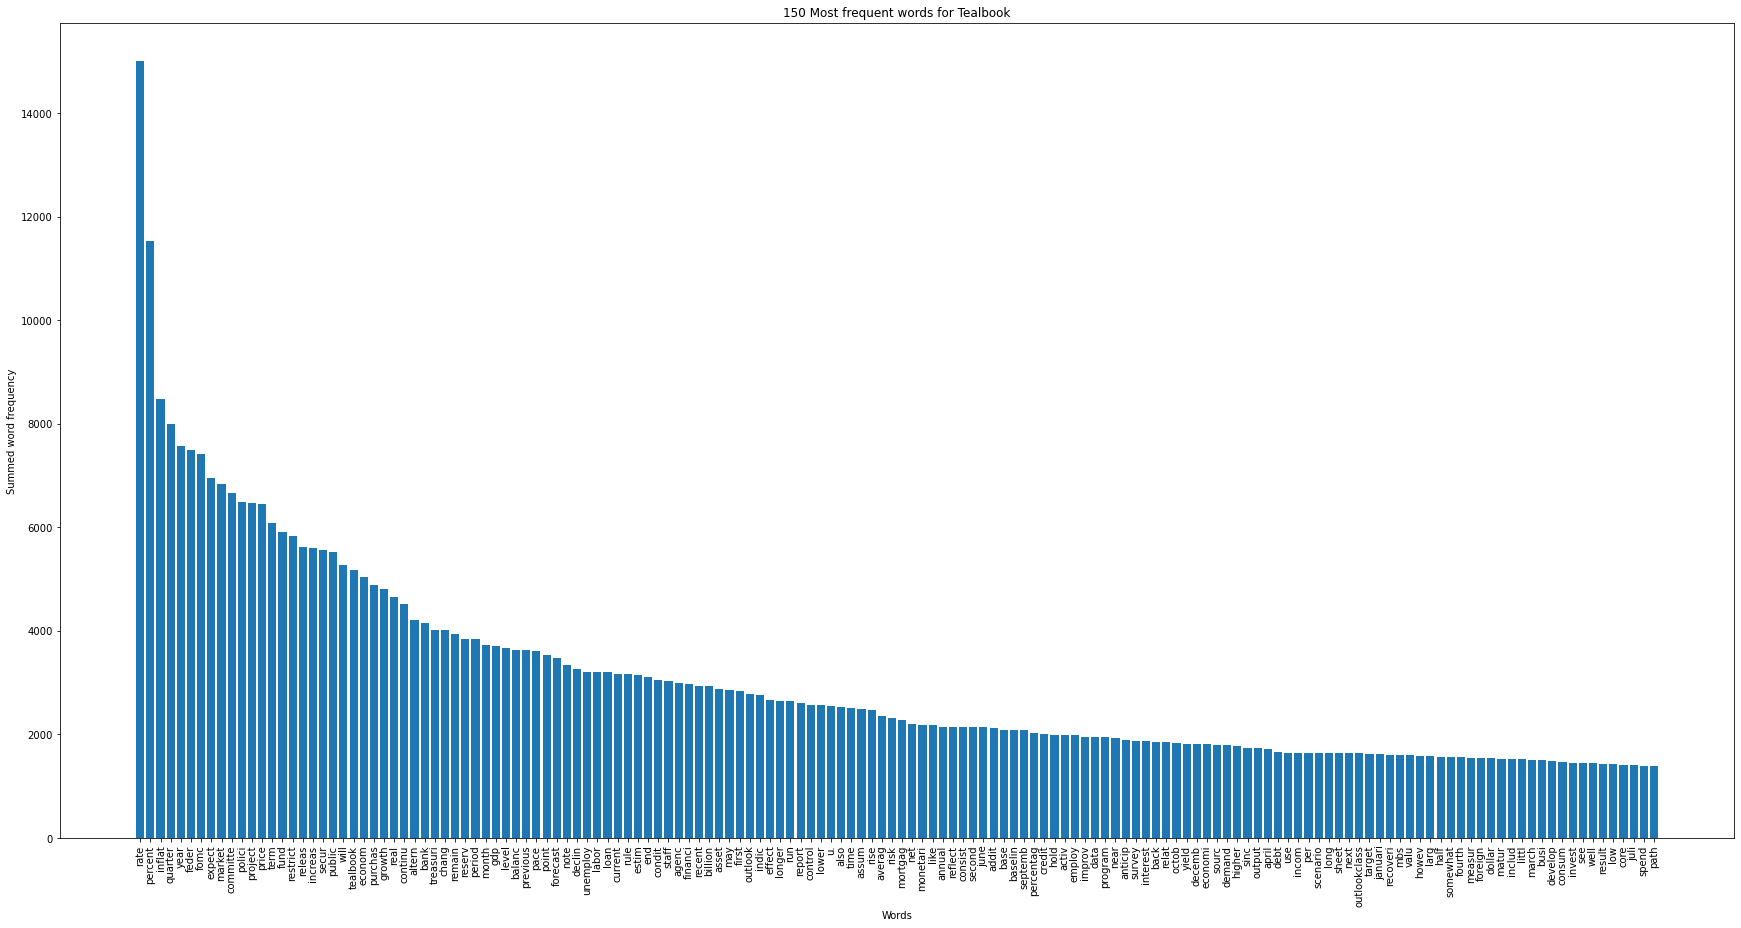

<Figure size 432x288 with 0 Axes>

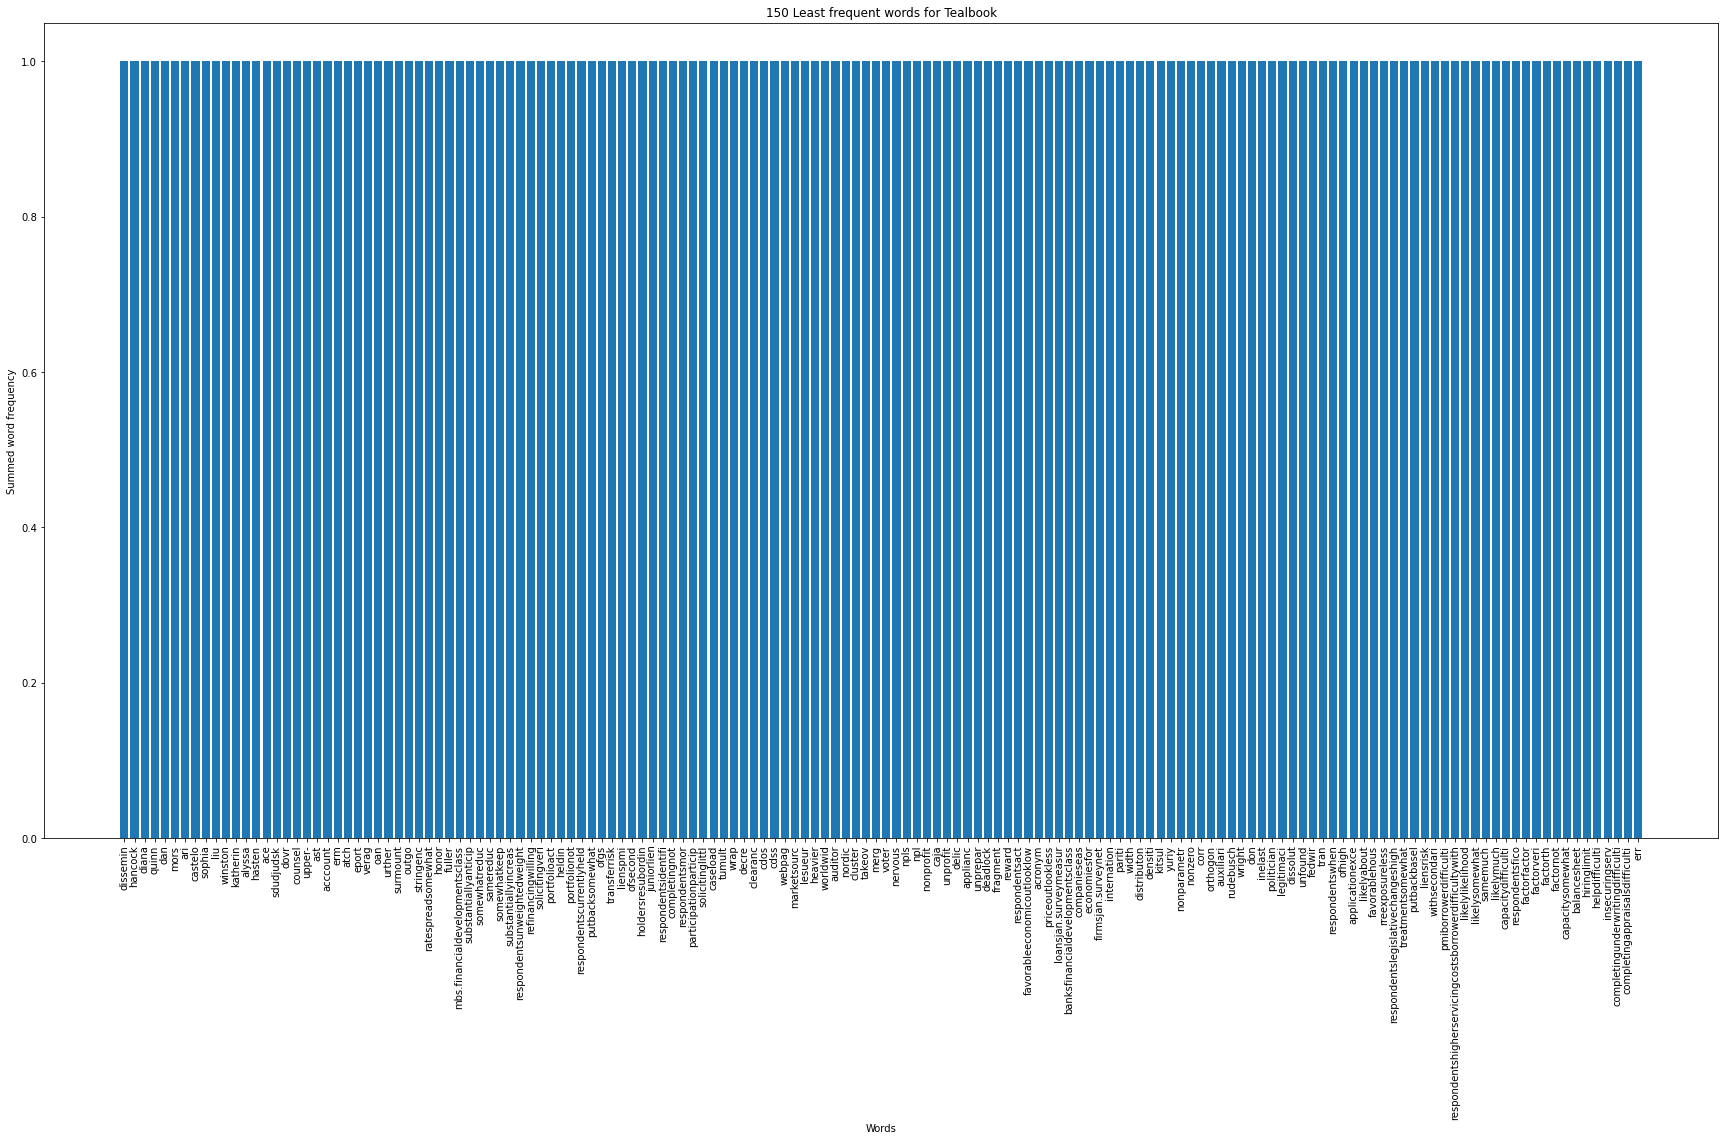

10.0% of Most Frequent Words in Tealbook
rate percent inflat quarter year feder fomc expect market committe polici project price term fund restrict releas increas secur public will tealbook econom purchas growth real continu altern bank treasuri chang remain reserv period month gdp level balanc previous pace point forecast note declin unemploy labor loan current rule estim end condit staff agenc financi recent billion asset may first outlook indic effect longer run report control lower u. also time assum rise averag risk mortgag net monetari like annual reflect consist second june addit base baselin septemb percentag credit hold activ employ improv data program near anticip survey interest back relat octob yield decemb economi sourc demand higher sinc output april debt use incom per scenario long sheet next outlookclass target januari recoveri mbs valu howev larg half somewhat fourth measur foreign dollar matur includ littl march busi develop consum invest see well result low core juli

In [7]:
# ---------------------------------- TEALBOOK -------------------------------------
# Read in dataframe
dataframe = pd.read_csv("/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_documentfrequencymatrix/Tealbook_dfm.csv", encoding ="utf-8") 

# Get column names as a list
word_list = list(dataframe.columns)

# Drop document from the list
word_list.remove('document')

# Drop first column from dataframe
dataframe = dataframe.drop(dataframe.columns[0], axis = 1)

# Get word frequencies
word_freq = []
for i in range(len(dataframe.columns)):
    total = dataframe[dataframe.columns[i]].sum()
    word_freq = word_freq + [total]
    
# Create dataframe for summed word frequencies
columns = ['word', 'summed_frequency']
sum_df = pd.DataFrame(columns=columns)
sum_df['word'] = word_list
sum_df['summed_frequency'] = word_freq
sum_df = sum_df.sort_values(by=['summed_frequency'], ascending=False)

# Thresholds for visualization trimming
total_len = len(dataframe.columns)
top_columns = 150
bottom_columns = (len(dataframe.columns) - 150)

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Create graphs and statistics for most and least frequent words
f = plt.subplots(figsize=(30,15))
plt.bar(most_freq_df['word'], most_freq_df['summed_frequency'])
plt.title('150 Most frequent words for Tealbook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/150_Most_frequent_words_for_Tealbook.png', dpi=200)

f = plt.subplots(figsize=(30,15))
plt.bar(least_freq_df['word'], least_freq_df['summed_frequency'])
plt.title('150 Least frequent words for Tealbook')
plt.xlabel('Words')
plt.ylabel('Summed word frequency')
plt.xticks(rotation=90)
plt.show()

# Print word stats

# Thresholds for word stats
total_len = len(dataframe.columns)
most = 0.1
bottom = 0.1
top_columns = round((len(dataframe.columns)) * most)
bottom_columns = round(len(dataframe.columns) - (len(dataframe.columns) * bottom))

# Trim down dataframe for most frequent words
most_freq_df = sum_df[0:top_columns]

# Trim down dataframe for least frequent words
least_freq_df = sum_df[bottom_columns:total_len]

# Reset the index of the dataframe
most_freq_df = most_freq_df.reset_index()
least_freq_df = least_freq_df.reset_index()

# Print found results
most_word_list_tealbook = []
for i in range(len(most_freq_df)):
    most_word_list_tealbook = most_word_list_tealbook + [most_freq_df['word'][i]]
    i = i + 1

print(str(most * 100) + '% of Most Frequent Words in Tealbook')
print(' '.join(most_word_list_tealbook))

least_word_list_tealbook = []
for i in range(len(least_freq_df)):
    least_word_list_tealbook = least_word_list_tealbook + [least_freq_df['word'][i]]
    i = i + 1
print('\n')
print(str(bottom * 100) + '% of Least Frequent Words in Tealbook')
print(' '.join(least_word_list_tealbook))

In [8]:
# ---------------------------------- COMPARE ACROSS BOOKS: MOST OCCURING TERMS -------------------------------------

# MOST OCCURING WORDS IN GREENBOOK, BLUEBOOK, TEALBOOK AND BEIGEBOOK = P (GBTP)
gbtp_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_bluebook) and (most_word_list_greenbook[i] in most_word_list_tealbook) and (most_word_list_greenbook[i] in most_word_list_beigebook):
        gbtp_overlap = gbtp_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK, BLUEBOOK, TEALBOOK & BEIGEBOOK')
print(gbtp_overlap)
print('\n')

# MOST OCCURING WORDS IN GREENBOOK, BLUEBOOK, AND TEALBOOK (GBT)
gbt_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_bluebook) and (most_word_list_greenbook[i] in most_word_list_tealbook):
        gbt_overlap = gbt_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK, BLUEBOOK & TEALBOOK')
print(gbt_overlap)
print('\n')

# MOST OCCURING WORDS IN GREENBOOK, BLUEBOOK AND BEIGEBOOK = P (GBP)
gbp_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_bluebook) and (most_word_list_greenbook[i] in most_word_list_beigebook):
        gbp_overlap = gbp_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK, BLUEBOOK, & BEIGEBOOK')
print(gbtp_overlap)
print('\n')

# MOST OCCURING WORDS IN GREENBOOK, TEALBOOK AND BEIGEBOOK = P (GTP)
gtp_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_tealbook) and (most_word_list_greenbook[i] in most_word_list_beigebook):
        gtp_overlap = gtp_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK, TEALBOOK & BEIGEBOOK')
print(gtp_overlap)
print('\n')

# MOST OCCURING WORDS IN BLUEBOOK, TEALBOOK AND BEIGEBOOK = P (BTP)
btp_overlap = []
for i in range(len(most_word_list_bluebook)):
    if (most_word_list_bluebook[i] in most_word_list_bluebook) and (most_word_list_bluebook[i] in most_word_list_tealbook) and (most_word_list_bluebook[i] in most_word_list_beigebook):
        btp_overlap = btp_overlap + [most_word_list_bluebook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE BLUEBOOK, TEALBOOK & BEIGEBOOK')
print(gbtp_overlap)
print('\n')

# MOST OCCURING WORDS IN GREENBOOK AND BLUEBOOK (GB)
gb_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_bluebook):
        gb_overlap = gb_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK AND BLUEBOOK')
print(gb_overlap)
print('\n')

# MOST OCCURING WORDS IN GREENBOOK AND TEALBOOK (GT)
gt_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_tealbook):
        gt_overlap = gt_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK AND TEALBOOK')
print(gt_overlap)
print('\n')

# MOST OCCURING WORDS IN GREENBOOK AND BEIGEBOOK = P (GP)
gp_overlap = []
for i in range(len(most_word_list_greenbook)):
    if (most_word_list_greenbook[i] in most_word_list_greenbook) and (most_word_list_greenbook[i] in most_word_list_beigebook):
        gp_overlap = gp_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK & BEIGEBOOK')
print(gp_overlap)
print('\n')

# MOST OCCURING WORDS IN BLUEBOOK AND TEALBOOK (BT)
bt_overlap = []
for i in range(len(most_word_list_bluebook)):
    if (most_word_list_bluebook[i] in most_word_list_bluebook) and (most_word_list_bluebook[i] in most_word_list_tealbook):
        bt_overlap = bt_overlap + [most_word_list_bluebook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE BLUEBOOK & TEALBOOK')
print(bt_overlap)
print('\n')

# MOST OCCURING WORDS IN BLUEBOOK AND BEIGEBOOK = P (BP)
bp_overlap = []
for i in range(len(most_word_list_bluebook)):
    if (most_word_list_bluebook[i] in most_word_list_bluebook) and (most_word_list_bluebook[i] in most_word_list_beigebook):
        bp_overlap = bp_overlap + [most_word_list_bluebook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE BLUEBOOK & BEIGEBOOK')
print(bp_overlap)
print('\n')

# MOST OCCURING WORDS IN TEALBOOK AND BEIGEBOOK = P (TP)
tp_overlap = []
for i in range(len(most_word_list_tealbook)):
    if (most_word_list_tealbook[i] in most_word_list_tealbook) and (most_word_list_tealbook[i] in most_word_list_beigebook):
        tp_overlap = tp_overlap + [most_word_list_greenbook[i]]
        i = i + 1
    i = i + 1

print('WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE TEALBOOK & BEIGEBOOK')
print(tp_overlap)

print('\n')
print('P = BEIGEBOOK')
print('Dataframe for most occursing words across different books compared to each other')
print('\n')
# Create dataframe for most occuring words across different books
columns = ['GBTP', 'GBT', 'GBP', 'GTP', 'BTP', 'GB', 'GT', 'GP', 'BT', 'BP', 'TP']
most_df = pd.DataFrame(columns=columns)
most_df['GBTP'] = pd.Series(gbtp_overlap)
most_df['GBT'] = pd.Series(gbt_overlap)
most_df['GBP'] = pd.Series(gbp_overlap)
most_df['GTP'] = pd.Series(gtp_overlap)
most_df['BTP'] = pd.Series(btp_overlap)
most_df['GB'] = pd.Series(gb_overlap)
most_df['GT'] = pd.Series(gt_overlap)
most_df['GP'] = pd.Series(gp_overlap)
most_df['BT'] = pd.Series(bt_overlap)
most_df['BP'] = pd.Series(bp_overlap)
most_df['TP'] = pd.Series(tp_overlap)
most_df = most_df.fillna('0')
print(most_df)

most_df.to_csv('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/10%_most_frequent_words_info_compared.csv', index = False)

# MOST FREQUENT TERMS DATAFRAME TO CSV
columns = ['Greenbook', 'Bluebook', 'Tealbook', 'Beigebook']
most_notcomp_df = pd.DataFrame(columns=columns)
most_notcomp_df['Greenbook'] = pd.Series(most_word_list_greenbook)
most_notcomp_df['Bluebook'] = pd.Series(most_word_list_bluebook)
most_notcomp_df['Tealbook'] = pd.Series(most_word_list_tealbook)
most_notcomp_df['Beigebook'] = pd.Series(most_word_list_beigebook)
most_notcomp_df = most_notcomp_df.fillna('0')
print('Dataframe for most occuring words across different books')
print(most_notcomp_df)
most_notcomp_df.to_csv('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/10%_most_frequent_words_info.csv', index = False)

# LEAST FREQUENT TERMS DATAFRAME TO CSV
columns = ['Greenbook', 'Bluebook', 'Tealbook', 'Beigebook']
least_df = pd.DataFrame(columns=columns)
least_df['Greenbook'] = pd.Series(least_word_list_greenbook)
least_df['Bluebook'] = pd.Series(least_word_list_bluebook)
least_df['Tealbook'] = pd.Series(least_word_list_tealbook)
least_df['Beigebook'] = pd.Series(least_word_list_beigebook)
least_df = least_df.fillna('0')
print('Dataframe for least occuring words across different books')
print(least_df)
least_df.to_csv('/Users/harukatakagi/Dropbox/FOMC_Board/FOMC_Historical_Materials_STATS+WordClouds/10%_least_frequent_words_info.csv', index = False)


WORDS THAT ARE MOST FREQUENTLY OCCURING: WORDS OCCUR SIMULTANEOUSLY IN THE GREENBOOK, BLUEBOOK, TEALBOOK & BEIGEBOOK
['percent', 'rate', 'quarter', 'year', 'price', 'increas', 'month', 'chang', 'growth', 'bank', 'declin', 'annual', 'market', 'expect', 'period', 'first', 'averag', 'product', 'real', 'recent', 'continu', 'level', 'u.', 'project', 'loan', 'point', 'industri', 'remain', 'dollar', 'consum', 'may', 'foreign', 'import', 'adjust', 'will', 'net', 'inflat', 'term', 'second', 'rise', 'last', 'sale', 'note', 'busi', 'rose', 'good', 'current', 'end', 'sinc', 'spend', 'estim', 'credit', 'new', 'larg', 'fourth', 'pace', 'indic', 'feder', 'also', 'percentag', 'per', 'relat', 'reflect', 'report', 'demand', 'season', 'januari', 'third', 'trade', 'part', 'domest', 'account', 'total', 'govern', 'octob', 'fund', 'unit', 'juli', 'state', 'oil', 'mortgag', 'sector', 'interest', 'half', 'august', 'activ', 'earlier', 'develop', 'howev', 'previous', 'econom', 'invest', 'april', 'inventori', 'ta

In [9]:
# ---------------------------------- SAVE MECHANISM -------------------------------------
save_notebook()
time.sleep(120)
output_HTML(current_file, output_file)